In [869]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys

import plotly.express as px
import plotly.graph_objects as go

from normalize_data import getNormalizedDataset

In [870]:
#Cargamos el dataframe
propiedades = df = getNormalizedDataset()

In [871]:
propiedades.dtypes

titulo                                object
descripcion                           object
tipodepropiedad                     category
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio                               float64
precio_dolar                         float64
precio_m2                            float64
extras                               float64
dtype: object

In [909]:
#Creo un nuevo dataframe que contengo solo la ciudad y el precio. Excluye los registros sin ciudad
precioPorProvincia = propiedades.dropna(subset=['provincia'])[['provincia', 'precio_dolar']]
precioPorProvincia = precioPorProvincia.groupby(['provincia']).mean()
precioPorProvinciaAsc = precioPorProvincia.sort_values(by=['precio_dolar'])

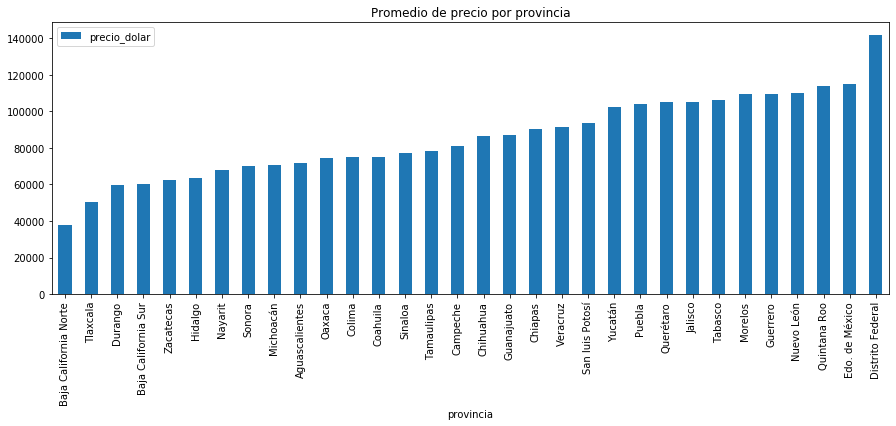

In [910]:
precioPorProvinciaAsc.plot(kind='bar', figsize=(15, 5), rot=90, 
                                       title="Promedio de precio por provincia");

In [913]:
def promedioPrecioPorCiudad(provincia):
    ciudadesPorProvincia = propiedades[['provincia', 'ciudad', 'precio_dolar']]
    ciudadesPorProvincia = ciudadesPorProvincia[ciudadesPorProvincia['provincia'] == provincia]

    ciudadesPorProvincia = ciudadesPorProvincia.groupby(['ciudad']).agg({'precio_dolar':'mean'})
    ciudadesPorProvincia = ciudadesPorProvincia.sort_values(by=['precio_dolar'])
    return ciudadesPorProvincia.head()

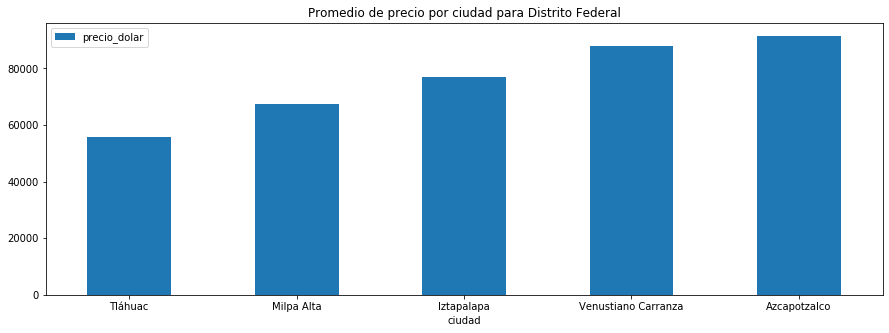

In [914]:
#Tomo 3 provincias que representen la mas cara, la mas barata y una media
promedioPrecioPorCiudad('Distrito Federal').plot(kind='bar', figsize=(15, 5), rot=0, 
                                       title="Promedio de precio por ciudad para Distrito Federal");

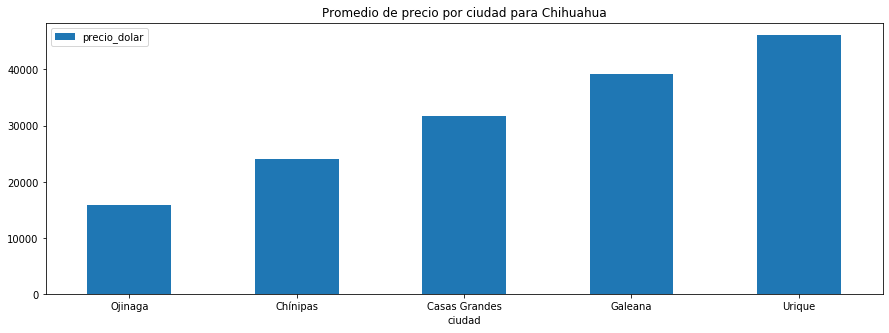

In [1004]:
promedioPrecioPorCiudad('Chihuahua').plot(kind='bar', figsize=(15, 5), rot=0, 
                                       title="Promedio de precio por ciudad para Chihuahua");

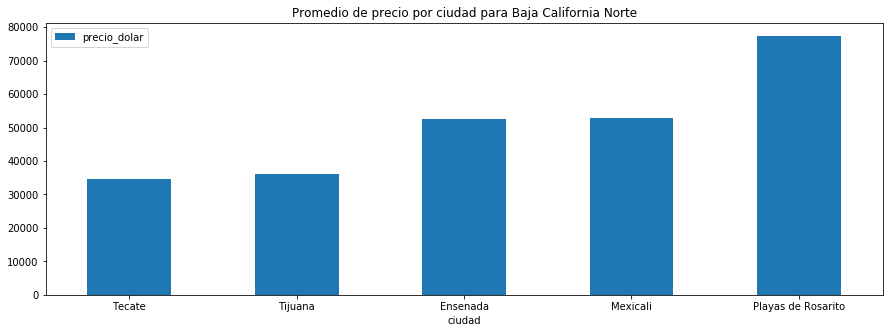

In [1005]:
promedioPrecioPorCiudad('Baja California Norte').plot(kind='bar', figsize=(15, 5), rot=0, 
                                       title="Promedio de precio por ciudad para Baja California Norte");

In [987]:
#Creo dataframe que tenga como columnas tipoDePropiedad y los amenities
amenitiesPorPropiedad = propiedades[['tipodepropiedad','piscina','gimnasio', 'usosmultiples']]

#Calculo la media de cada amenitie por propiedad
amenitiesPorPropiedad = amenitiesPorPropiedad.groupby(['tipodepropiedad']).mean()
amenitiesPorPropiedad.dropna(inplace=True)

#Elimino los registros que tienen cero en algun amenitie, si no están en el grafico no tienen amenitie
#TODO: Improve filter method
amenitiesPorPropiedad = amenitiesPorPropiedad.loc[lambda x: x['gimnasio'] != 0.000000, :].loc[lambda x: x['usosmultiples'] != 0.000000, :].loc[lambda x: x['piscina'] != 0.000000, :]
amenitiesPorPropiedad = amenitiesPorPropiedad.T * 100



tipodepropiedad,Apartamento,Casa,Casa en condominio,Departamento Compartido,Oficina comercial
piscina,13.41,6.47,16.07,16.03,0.06
gimnasio,12.40,4.14,6.50,22.90,0.06
usosmultiples,10.32,3.27,9.84,17.56,0.13


In [1003]:
print("Piscina por tipo de propiedad")
fig = go.Figure()
df = pd.DataFrame(dict(
    r=amenitiesPorPropiedad.loc['piscina'],
    theta=amenitiesPorPropiedad.columns))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

Piscina por tipo de propiedad


In [1002]:
print("Gimnasio por tipo de propiedad")
fig = go.Figure()
df = pd.DataFrame(dict(
    r=amenitiesPorPropiedad.loc['gimnasio'],
    theta=amenitiesPorPropiedad.columns))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

Gimnasio por tipo de propiedad


In [1001]:
print("Usosmultiples por tipo de propiedad")
fig = go.Figure()
df = pd.DataFrame(dict(
    r=amenitiesPorPropiedad.loc['usosmultiples'],
    theta=amenitiesPorPropiedad.columns))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

Usosmultiples por tipo de propiedad
